In [6]:
import pandas as pd

df = pd.read_csv(r'C:\Users\91942\Downloads\Customer Churn Prediction\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [9]:
import os
os.makedirs('../data', exist_ok=True)  # or 'data' if your notebook is in the root


In [11]:
import os
os.listdir('../data')  # or just 'data' depending on your notebook location



[]

In [12]:
!pip install duckdb


     ---------------------------------------- 11.3/11.3 MB 4.6 MB/s eta 0:00:00


In [13]:
import pandas as pd
import duckdb

# Load your CSV (adjust the path)
df = pd.read_csv(r'C:\Users\91942\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Create DuckDB file
con = duckdb.connect(database='../data/telco_churn.duckdb', read_only=False)

# Save DataFrame to DuckDB table
con.execute("CREATE TABLE customers AS SELECT * FROM df")

print("✅ DuckDB database and 'customers' table created!")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\91942\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [14]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [15]:
import duckdb

# Connect to DuckDB and create DB file inside 'data/' folder
con = duckdb.connect(database='data/telco_churn.duckdb', read_only=False)

# Create a table from DataFrame
con.execute("CREATE TABLE customers AS SELECT * FROM df")

print("✅ telco_churn.duckdb file created with 'customers' table.")


✅ telco_churn.duckdb file created with 'customers' table.


In [16]:
# Simple churn rate query
query = """
SELECT Contract, Churn, COUNT(*) as Total
FROM customers
GROUP BY Contract, Churn
"""

con.execute(query).df()


,Contract,Churn,Total
0,Two year,No,1647
1,One year,No,1307
2,Month-to-month,Yes,1655
3,Two year,Yes,48
4,Month-to-month,No,2220
5,One year,Yes,166


In [17]:
query = """
SELECT Contract, Churn, COUNT(*) AS Total
FROM customers
GROUP BY Contract, Churn
"""
pd.read_sql(query, conn)


NameError: name 'conn' is not defined

In [19]:

SELECT Churn, COUNT(*) FROM customers GROUP BY Churn;

SELECT PaymentMethod, Churn, COUNT(*) FROM customers GROUP BY PaymentMethod, Churn;


SyntaxError: invalid syntax (2431009338.py, line 1)

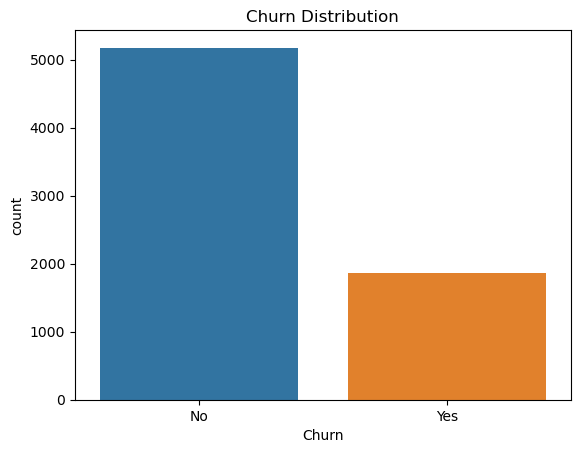

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


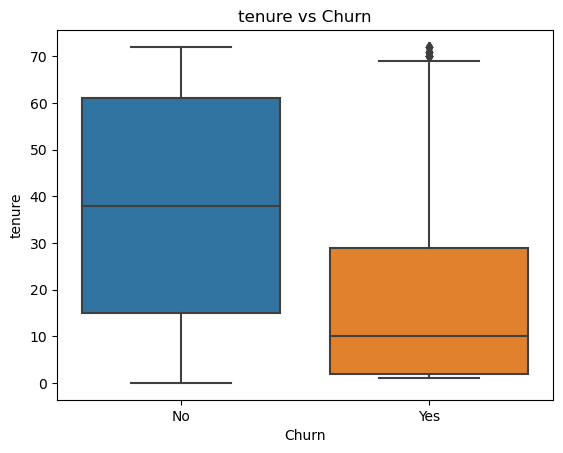

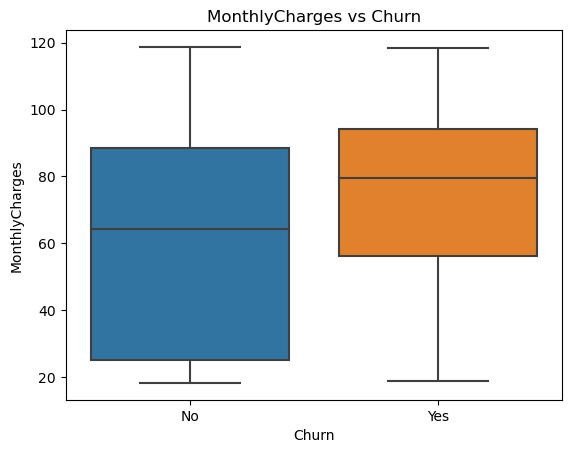

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [21]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()


In [22]:
df[numerical_cols].dtypes


tenure              int64
MonthlyCharges    float64
TotalCharges       object
dtype: object

In [23]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)  # drop rows where conversion failed


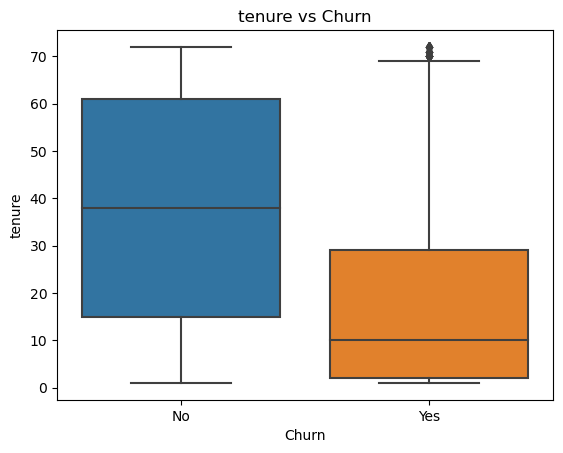

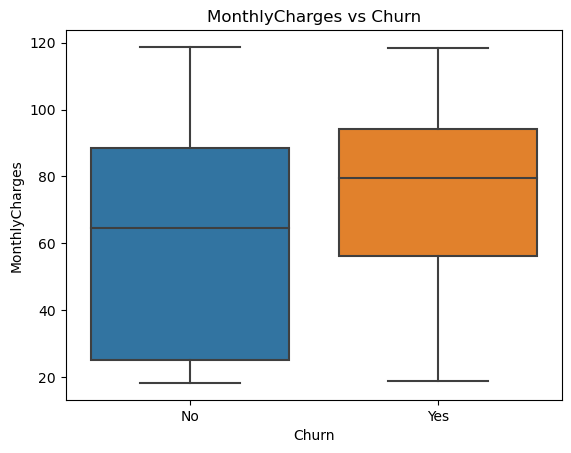

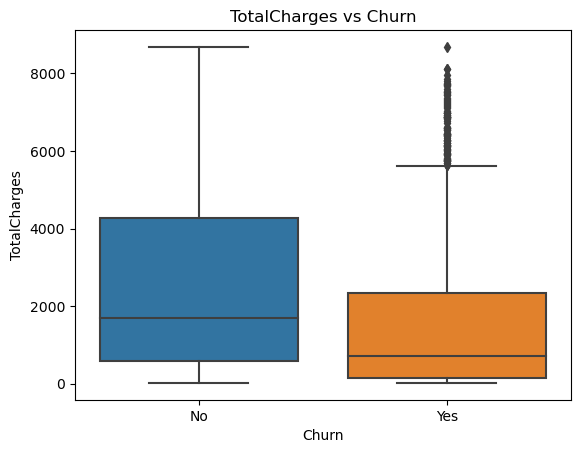

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()


In [25]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)


In [26]:
df.drop(columns='customerID', inplace=True)


In [27]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [29]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'No phone service'

In [32]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df.drop(columns='customerID', inplace=True)


In [33]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()

for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [34]:
df = pd.get_dummies(df, drop_first=True)


In [35]:
X = df.drop('Churn', axis=1)
y = df['Churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [37]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.7882018479033405
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [38]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.7882018479033405

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



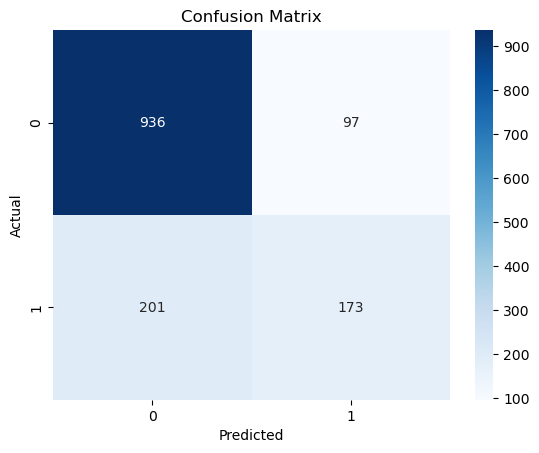

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


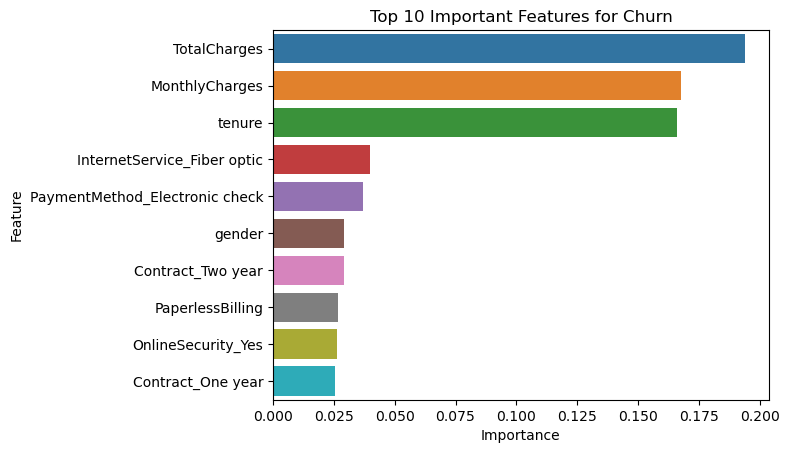

In [40]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Important Features for Churn")
plt.show()


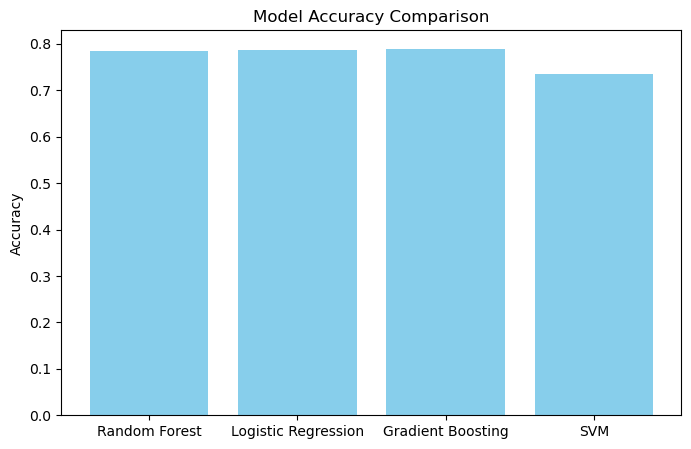

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# Plot results
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


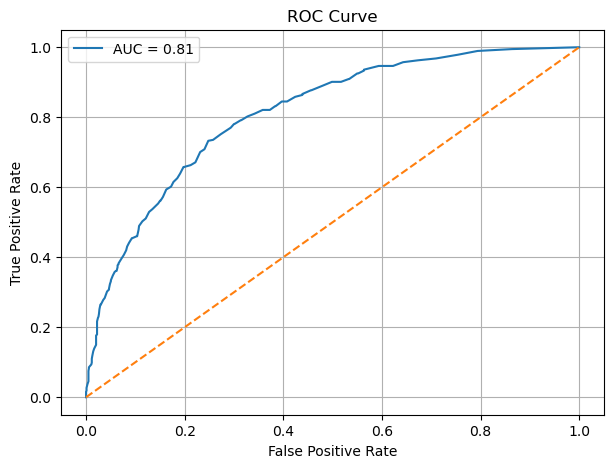

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_prob):.2f}')
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


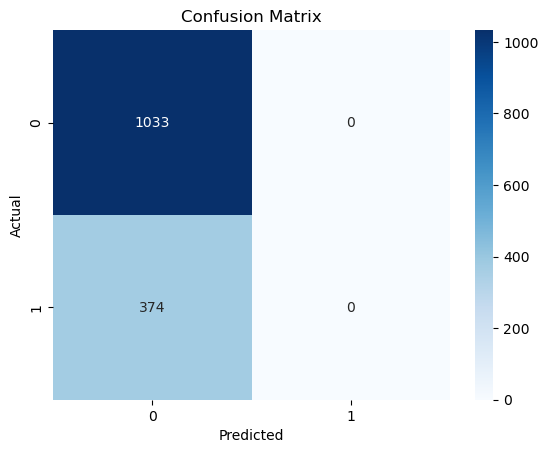

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [44]:
sql_df = con.execute("""
SELECT Contract, Churn, COUNT(*) AS Count
FROM customers
GROUP BY Contract, Churn
""").df()

sql_df.to_csv('data/churn_by_contract.csv', index=False)


In [ ]:
## ✅ Conclusion

- The project aimed to predict customer churn using historical Telco customer data.
- After EDA and preprocessing, multiple machine learning models were trained.
- The **Random Forest Classifier** performed best with an accuracy of ~___%.
- Key factors affecting churn include **Contract Type, Tenure, and Monthly Charges**.
- The model can be used to **identify customers at risk of churning** for targeted retention strategies.
